<a href="https://colab.research.google.com/github/Albina1810/MLproject/blob/master/Cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](https://www.incimages.com/uploaded_files/image/970x450/getty_543594288_314566.jpg)

# **CEREAL'S  RATING PREDICTION ** 



*  American consumes about 10 pounds or 160 bowls of cereal per year or about 4.5 kilograms. 

*  This may seem like a lot but America is only ranked fourth in cereal consumption.
*  What makes cereal good? 


 **Goal of the project: Given the nutritions facts, predict the rating of the cereals**
 
** data: **https://www.kaggle.com/crawford/80-cereals
 


In [0]:
#numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# **Data Ingest**

In [0]:
from google.colab import files
files.upload()

Saving cereal.csv to cereal (2).csv


{'cereal.csv': b"name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating\r\n100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973\r\n100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679\r\nAll-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505\r\nAll-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912\r\nAlmond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843\r\nApple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541\r\nApple Jacks,K,C,110,2,0,125,1,11,14,30,25,2,1,1,33.174094\r\nBasic 4,G,C,130,3,2,210,2,18,8,100,25,3,1.33,0.75,37.038562\r\nBran Chex,R,C,90,2,1,200,4,15,6,125,25,1,1,0.67,49.120253\r\nBran Flakes,P,C,90,3,0,210,5,13,5,190,25,3,1,0.67,53.313813\r\nCap'n'Crunch,Q,C,120,1,2,220,0,12,12,35,25,2,1,0.75,18.042851\r\nCheerios,G,C,110,6,2,290,2,17,1,105,25,1,1,1.25,50.764999\r\nCinnamon Toast Crunch,G,C,120,1,3,210,0,13,9,45,25,2,1,0.75,19.823573\r\nClusters,G,C,110,3,2,140,

In [0]:
data = pd.read_csv("cereal.csv")
data.head(5)

name mfr type  calories  protein  fat  sodium  fiber  \
0                  100% Bran   N    C        70        4    1     130   10.0   
1          100% Natural Bran   Q    C       120        3    5      15    2.0   
2                   All-Bran   K    C        70        4    1     260    9.0   
3  All-Bran with Extra Fiber   K    C        50        4    0     140   14.0   
4             Almond Delight   R    C       110        2    2     200    1.0   

   carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
0    5.0       6     280        25      3     1.0  0.33  68.402973  
1    8.0       8     135         0      3     1.0  1.00  33.983679  
2    7.0       5     320        25      3     1.0  0.33  59.425505  
3    8.0       0     330        25      3     1.0  0.50  93.704912  
4   14.0       8      -1        25      3     1.0  0.75  34.384843

In [0]:
data.shape

(77, 16)

In [0]:
data.isnull().sum() 

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

# **EDA**

In [0]:
data['mfr'].replace(["N","Q","R", "K", "G", "P", "A"],["Nabisco","Quaker Oats","Ralston Purina","Kellog", "General Mills", "Post","American Home Food Products"], inplace= True)
data["type"].replace(["C", "H"], ["Cold", "Hot"], inplace = True)
data.head(5)
data = data.sort_values(by=['rating'], ascending=False)
data.head()

name      mfr  type  calories  protein  fat  sodium  \
3   All-Bran with Extra Fiber   Kellog  Cold        50        4    0     140   
64     Shredded Wheat 'n'Bran  Nabisco  Cold        90        3    0       0   
65  Shredded Wheat spoon size  Nabisco  Cold        90        3    0       0   
0                   100% Bran  Nabisco  Cold        70        4    1     130   
63             Shredded Wheat  Nabisco  Cold        80        2    0       0   

    fiber  carbo  sugars  potass  vitamins  shelf  weight  cups     rating  
3    14.0    8.0       0     330        25      3    1.00  0.50  93.704912  
64    4.0   19.0       0     140         0      1    1.00  0.67  74.472949  
65    3.0   20.0       0     120         0      1    1.00  0.67  72.801787  
0    10.0    5.0       6     280        25      3    1.00  0.33  68.402973  
63    3.0   16.0       0      95         0      1    0.83  1.00  68.235885

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



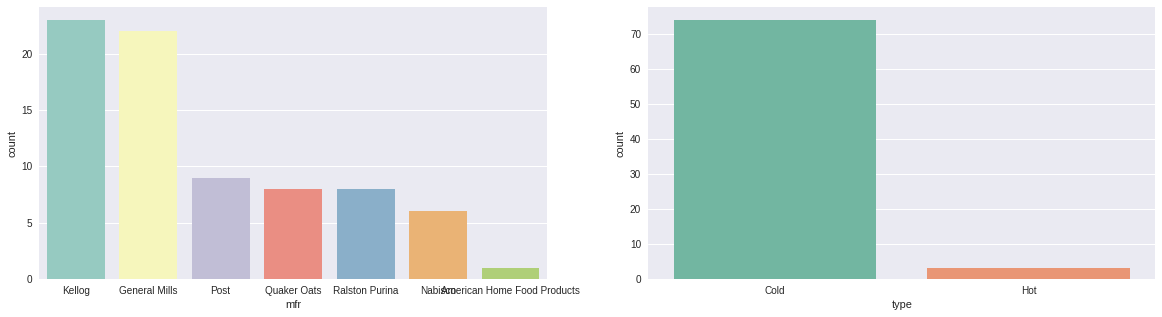

In [0]:
f, axes = plt.subplots(1,2, figsize=(20, 5))
sns.countplot(x="mfr", data=data, ax=axes[0], palette="Set3", order = data['mfr'].value_counts().index)
sns.countplot(x="type", data=data, ax=axes[1], palette="Set2")

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text= data["name"].values


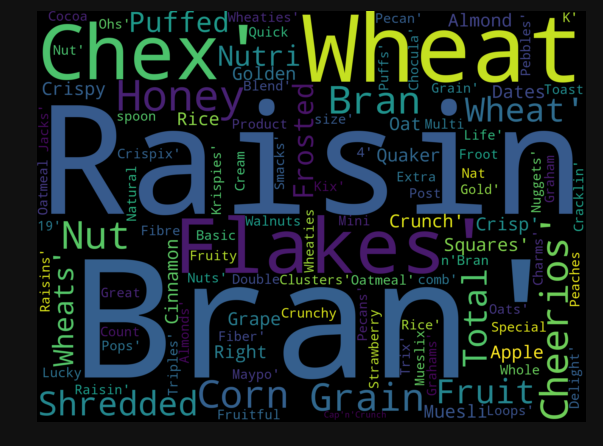

In [0]:
wordcloud = WordCloud(
    width = 2000,
    height =1500,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))

fig = plt.figure(
    figsize = (10, 6),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



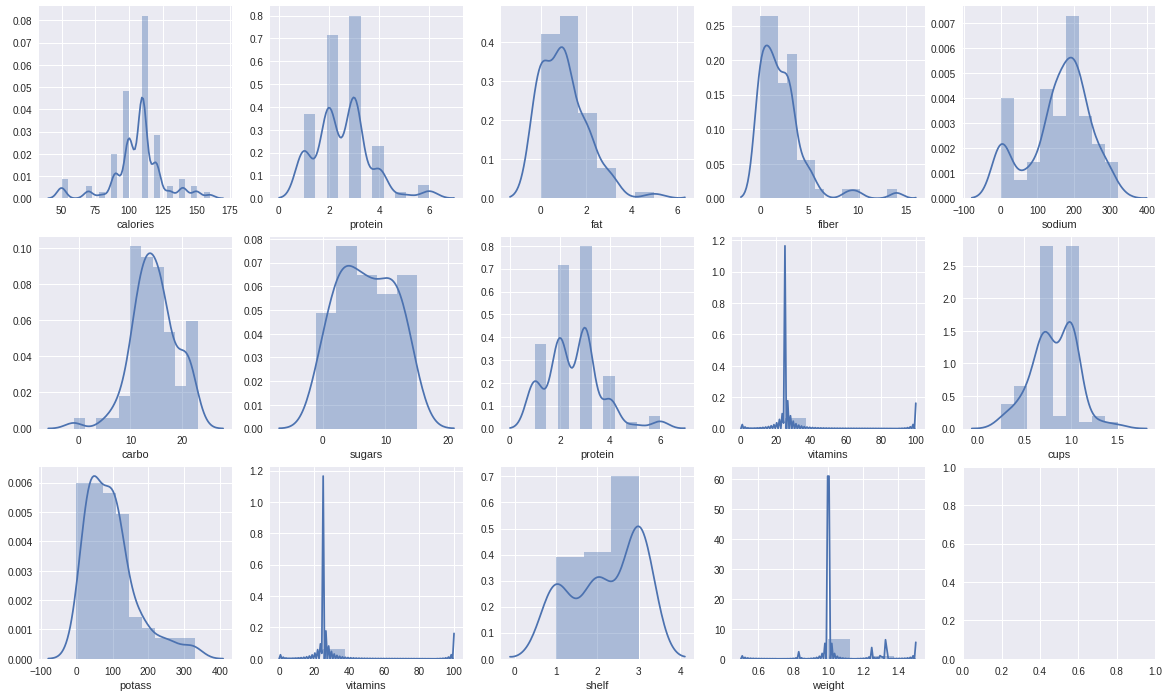

In [0]:
f, axes = plt.subplots(3,5, figsize=(20, 12))
sns.distplot( data["calories"], ax=axes[0,0])
sns.distplot( data["protein"], ax=axes[0,1])
sns.distplot( data["fat"], ax=axes[0,2])
sns.distplot( data["fiber"], ax=axes[0,3])
sns.distplot( data["sodium"], ax=axes[0,4])
sns.distplot( data["carbo"], ax=axes[1,0])
sns.distplot( data["sugars"], ax=axes[1,1])
sns.distplot( data["protein"], ax=axes[1,2])
sns.distplot( data["vitamins"], ax=axes[1,3])
sns.distplot( data["cups"], ax=axes[1,4])
sns.distplot( data["potass"], ax=axes[2,0])
sns.distplot( data["vitamins"], ax=axes[2,1])
sns.distplot( data["shelf"], ax=axes[2,2])
sns.distplot( data["weight"], ax=axes[2,3])

# **Manufacturer use different cups and weight for one serving**: comparing nutriotions is useless

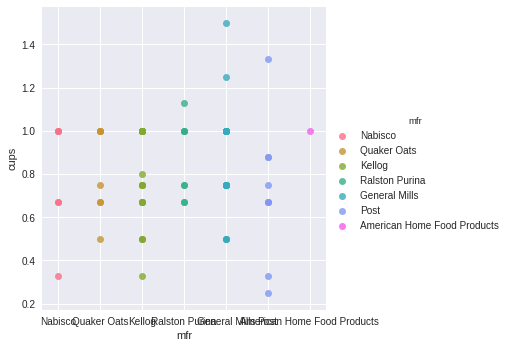

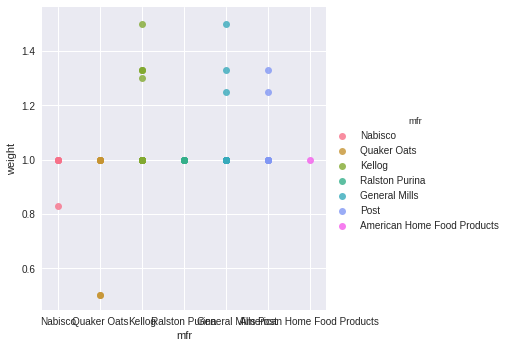

In [0]:
sns.lmplot(x ="mfr", y="cups",fit_reg=False, hue = "mfr", data = data)
sns.lmplot(x ="mfr", y="weight",fit_reg=False, hue = "mfr", data = data)

**Which features impcat the rating the most?**

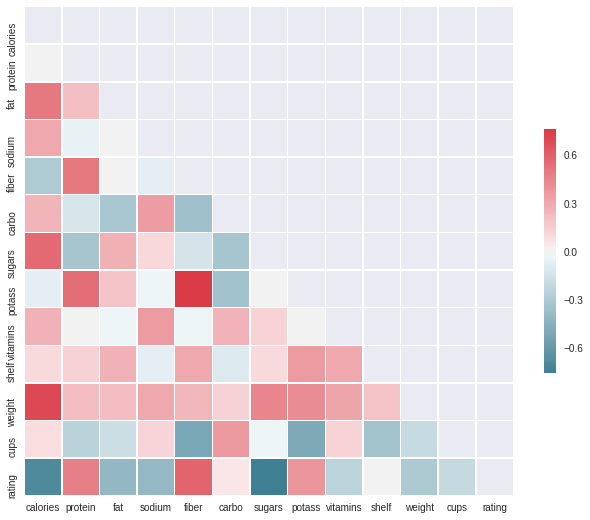

In [0]:
# Compute the correlation matrix
corr=data.iloc[:,~data.columns.isin(['name','mfr','type'])].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **Modelling **

![alt text](https://pbs.twimg.com/media/D0CgyESV4AASHqZ.jpg:large)





**S0, it seems to be REGRESSION *, not classification problem

In [0]:
df = data.drop(["name", "mfr", "type"], axis = 1)
X = df.drop(["rating"], axis = 1)
y = df["rating"]
X.shape, y.shape
y=y.astype(int)
df.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
3         50        4    0     140   14.0    8.0       0     330        25   
64        90        3    0       0    4.0   19.0       0     140         0   
65        90        3    0       0    3.0   20.0       0     120         0   
0         70        4    1     130   10.0    5.0       6     280        25   
63        80        2    0       0    3.0   16.0       0      95         0   

    shelf  weight  cups     rating  
3       3    1.00  0.50  93.704912  
64      1    1.00  0.67  74.472949  
65      1    1.00  0.67  72.801787  
0       3    1.00  0.33  68.402973  
63      1    0.83  1.00  68.235885

 **Split the dataset into training and testing samples**


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=1)


In [0]:

from sklearn.linear_model import LinearRegression

In [0]:
y_test.shape

(16,)

In [0]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions.shape

(16,)

**Write down Prediction to csv**

In [0]:
prediction = pd.DataFrame({
        "rating_fact": y_test,
        "Predicted Rating": predictions
    })

prediction.to_csv('prediction.csv', index=False)


In [0]:
from google.colab import files
files.download("prediction.csv")


**Accuracy of the model is 99%**

In [0]:
model.score(X_test, y_test)

0.9995231928897267

Text(0, 0.5, 'Predicted')

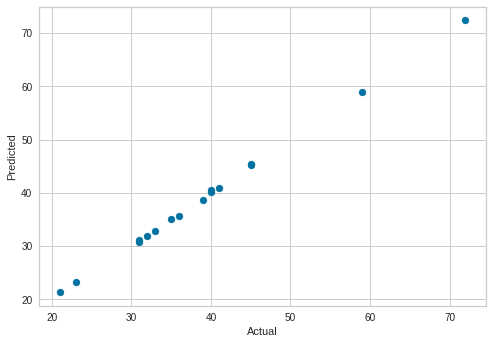

In [0]:
from matplotlib import pyplot as plt
plt.scatter(y_test, predictions)
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [0]:
prediction.head(10)

Predicted Rating  rating_fact
53         40.925691           41
72         38.569429           39
16         45.327481           45
35         21.318830           21
24         31.849522           32
25         31.075650           31
36         30.707781           31
22         35.707110           36
62         40.050288           40
6          32.886566           33

In [0]:
print('Coefficients: \n', model.coef_)

Coefficients: 
 [-0.22335692  3.35829994 -1.71985827 -0.05452395  3.47882424  1.11801479
 -0.68281404 -0.03485541 -0.05288894 -0.00415877 -0.60464987 -0.22303267]


In [0]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, predictions))

Mean squared error: 0.07


# **Clustering**

In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(df))
print(scaler.transform(df))

MinMaxScaler(copy=True, feature_range=(0, 1))
[[0.         0.6        0.         ... 0.5        0.2        1.        ]
 [0.36363636 0.4        0.         ... 0.5        0.336      0.74581762]
 [0.36363636 0.4        0.         ... 0.5        0.336      0.72373043]
 ...
 [0.63636364 0.         0.4        ... 0.5        0.6        0.05059922]
 [0.63636364 0.         0.6        ... 0.5        0.4        0.0235352 ]
 [0.63636364 0.         0.4        ... 0.5        0.4        0.        ]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
df.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
3         50        4    0     140   14.0    8.0       0     330        25   
64        90        3    0       0    4.0   19.0       0     140         0   
65        90        3    0       0    3.0   20.0       0     120         0   
0         70        4    1     130   10.0    5.0       6     280        25   
63        80        2    0       0    3.0   16.0       0      95         0   

    shelf  weight  cups     rating  
3       3    1.00  0.50  93.704912  
64      1    1.00  0.67  74.472949  
65      1    1.00  0.67  72.801787  
0       3    1.00  0.33  68.402973  
63      1    0.83  1.00  68.235885

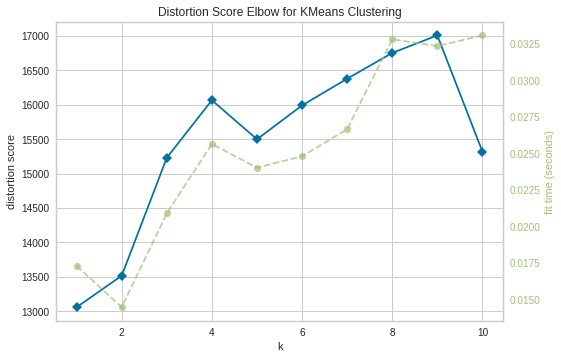

In [0]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

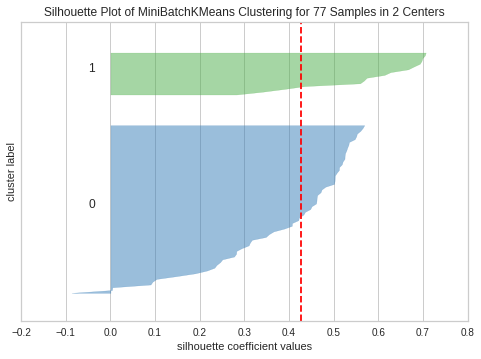

In [0]:
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
model = MiniBatchKMeans (2)
visualizer = SilhouetteVisualizer(model)

visualizer.fit(df) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

In [0]:
df.head()

calories  protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  \
3         50        4    0     140   14.0    8.0       0     330        25   
64        90        3    0       0    4.0   19.0       0     140         0   
65        90        3    0       0    3.0   20.0       0     120         0   
0         70        4    1     130   10.0    5.0       6     280        25   
63        80        2    0       0    3.0   16.0       0      95         0   

    shelf  weight  cups     rating  
3       3    1.00  0.50  93.704912  
64      1    1.00  0.67  74.472949  
65      1    1.00  0.67  72.801787  
0       3    1.00  0.33  68.402973  
63      1    0.83  1.00  68.235885

In [0]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2)
kmeans = k_means.fit(scaler.transform(df))
data['cluster'] = kmeans.labels_
data.sample(4)

name            mfr  type  calories  protein  fat  sodium  \
7             Basic 4  General Mills  Cold       130        3    2     210   
9         Bran Flakes           Post  Cold        90        3    0     210   
11           Cheerios  General Mills  Cold       110        6    2     290   
50  Nutri-grain Wheat         Kellog  Cold        90        3    0     170   

    fiber  carbo  sugars  potass  vitamins  shelf  weight  cups     rating  \
7     2.0   18.0       8     100        25      3    1.33  0.75  37.038562   
9     5.0   13.0       5     190        25      3    1.00  0.67  53.313813   
11    2.0   17.0       1     105        25      1    1.00  1.25  50.764999   
50    3.0   18.0       2      90        25      3    1.00  1.00  59.642837   

    cluster  
7         0  
9         0  
11        1  
50        0

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [0]:
cluster_0 = data[data.cluster==0]
cluster_0 = cluster_0['name'].values
len(cluster_0)


40

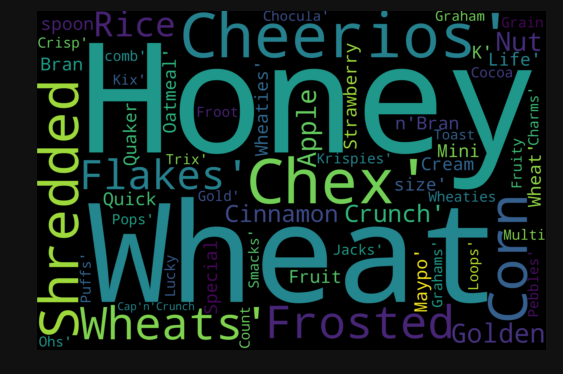

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(cluster_0))

fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [0]:
cluster_1 = data[data.cluster==1]
cluster_1 = cluster_1['name'].values
len(cluster_1)


37

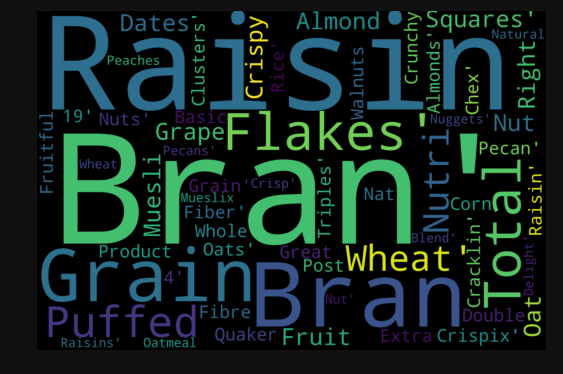

In [0]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(cluster_1))

fig = plt.figure(
    figsize = (10, 5),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [0]:
def enable_plotly_in_cell():
  import IPython
  from plotly.offline import init_notebook_mode
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
  '''))
  init_notebook_mode(connected=False)

In [0]:
import plotly.offline as py
import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
enable_plotly_in_cell()


trace1 = go.Scatter3d(
    x=data["calories"],
    y=data["rating"],
    z=data["shelf"],
    mode='markers',
    text=data["name"],
    marker=dict(
        size=12,
        color=data["cluster"],                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
#print(trace1)
data1 = [trace1]
layout = go.Layout(
    showlegend=False,
    title="shelf-Ratings-Sugar",
    scene = dict(
        xaxis = dict(title='X: calories '),
        yaxis = dict(title="Y: rating "),
        zaxis = dict(title="Z: shelf "),
    ),
    width=1000,
    height=900,
)
fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

In [0]:
sugarsort = data.sort_values(by=['sugars'], ascending=False)
sugarsort.sample(5)

name            mfr  type  calories  \
31                          Golden Grahams  General Mills  Cold       110   
21                                 Crispix         Kellog  Cold       110   
10                            Cap'n'Crunch    Quaker Oats  Cold       120   
68                 Strawberry Fruit Wheats        Nabisco  Cold        90   
27  Fruit & Fibre Dates; Walnuts; and Oats           Post  Cold       120   

    protein  fat  sodium  fiber  carbo  sugars  potass  vitamins  shelf  \
31        1    1     280    0.0   15.0       9      45        25      2   
21        2    0     220    1.0   21.0       3      30        25      3   
10        1    2     220    0.0   12.0      12      35        25      2   
68        2    0      15    3.0   15.0       5      90        25      2   
27        3    2     160    5.0   12.0      10     200        25      3   

    weight  cups     rating  cluster  
31    1.00  0.75  23.804043        1  
21    1.00  1.00  46.895644        0  
10    1.00  0.75  18.042851        1  
68    1.00  1.00  59.363993        1  
27    1.25  0.67  40.917047        0

In [0]:
quality = data["sugars"].values
category = []
for num in quality:
    if num<5:
        category.append("Good")
    elif num>10:
        category.append("Bad")
    else:
        category.append("Mid")

category = pd.DataFrame(data=category, columns=["category"])
datanew = pd.concat([sugarsort,category],axis=1)
datanew.sample(5)

name             mfr  type  calories  protein  fat  \
17               Corn Pops          Kellog  Cold       110        1    0   
73                    Trix   General Mills  Cold       110        1    1   
39  Just Right Fruit & Nut          Kellog  Cold       140        3    1   
56      Quaker Oat Squares     Quaker Oats  Cold       100        4    1   
15               Corn Chex  Ralston Purina  Cold       110        2    0   

    sodium  fiber  carbo  sugars  potass  vitamins  shelf  weight  cups  \
17      90    1.0   13.0      12      20        25      2     1.0  1.00   
73     140    0.0   13.0      12      25        25      2     1.0  1.00   
39     170    2.0   20.0       9      95       100      3     1.3  0.75   
56     135    2.0   14.0       6     110        25      3     1.0  0.50   
15     280    0.0   22.0       3      25        25      1     1.0  1.00   

       rating  cluster category  
17  35.782791        1      Bad  
73  27.753301        1      Bad  
39  36.471512        0      Mid  
56  49.511874        0      Mid  
15  41.445019        1     Good

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning:

remove_na is deprecated and is a private function. Do not use.



Mid     30
Good    26
Bad     21
Name: category, dtype: int64

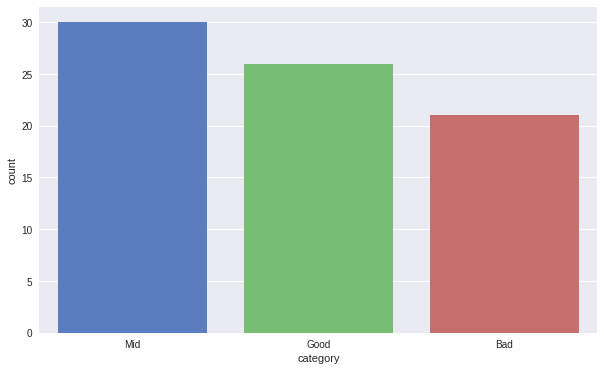

In [0]:
plt.figure(figsize=(10,6))
sns.countplot(datanew["category"],palette="muted")
datanew["category"].value_counts()

Conclusion.
1. LM gives the most accurate prediction for the data
2. Sugara is the most important feature that defines rating 
3. The nutrition displayed on the cereal boxes is measured by serving, which is not a standardized unit. Each manufacturer has its own definition of serving. Further, the same manufacturer can have different definition of serving for different cereals. 
**Comparing nutrition by serving alone is pointless!**


Next Steps:
1. does price impact on rating?
2. Suggestion to place the product on the shelves  by sugars rate